## Importing Libraries

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio as rio
from mpl_toolkits import mplot3d
import numpy as np
import earthpy.plot as ep
import earthpy as et
import geopy
from geopy.geocoders import Nominatim
import geoplot
from geopandas.tools import geocode
from matplotlib import collections, colors, transforms
from PIL import Image
from rasterio.windows import Window
from rasterio.windows import from_bounds
import plotly
import requests
import json
import plotly.graph_objects as go

## Reading  Tiff file using Rasterio

In [16]:
# Reading data from dsm (geotiff files)
dsm_brussel = r"C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k31/GeoTIFF/DHMVIIDSMRAS1m_k31.tif"
d_file = rio.open(dsm_brussel)

# Plotting dsm lidar map
#show(d_file)

## Working with Shapefile

In [4]:
#Reading shapefile using geopandas

geo_dsm = gpd.read_file("C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k31/DHMVII_vdc_k31/DHMVII_vdc_k31.shp")
geo_dsm

Date   OpnDatum1   OpnDatum2   OpnDatum3   OpnDatum4  \
0    ['20140310']  2014-03-10        None        None        None   
1    ['20140312']  2014-03-12        None        None        None   
2    ['20140313']  2014-03-13        None        None        None   
3    ['20140314']  2014-03-14        None        None        None   
4    ['20140319']  2014-03-19        None        None        None   
..            ...         ...         ...         ...         ...   
99   ['20140331']  2014-03-24  2014-03-25  2014-03-30  2014-03-31   
100  ['20140324']  2014-03-24  2014-03-25  2014-03-31  2014-04-01   
101  ['20140330']  2014-03-25  2014-03-28  2014-03-29  2014-03-30   
102  ['20140325']  2014-03-25  2014-03-28  2014-03-29  2014-03-30   
103  ['20140328']  2014-03-25  2014-03-28  2014-03-31  2014-04-01   

                                              geometry  
0    MULTIPOLYGON (((139515.930 177999.990, 139524....  
1    POLYGON ((137543.185 177999.990, 137502.150 17...  
2    POLYGON ((134863.140 177999.990, 134849.660 17...  
3    POLYGON ((131784.960 158000.001, 131779.510 15...  
4    POLYGON ((141692.020 177999.990, 141682.794 17...  
..                                                 ...  
99   POLYGON ((150544.497 160587.266, 150546.410 16...  
100  POLYGON ((150511.229 159150.864, 150511.910 15...  
101  POLYGON ((160847.334 172910.266, 160848.510 17...  
102  POLYGON ((160850.616 160624.570, 160850.420 16...  
103  POLYGON ((160851.713 159152.646, 160852.370 15...  

[104 rows x 6 columns]

In [5]:
geo_dsm.bounds

minx           miny           maxx           maxy
0    137816.382014  158000.000000  139528.590088  177999.990112
1    135108.340088  157999.999965  137604.570129  177999.990295
2    131966.060120  157999.999941  134870.140076  177999.990295
3    130000.000000  157999.999939  132000.022888  177999.990112
4    141670.120117  177999.986628  141692.020081  177999.990029
..             ...            ...            ...            ...
99   149956.890076  160082.696131  150553.000122  160621.660095
100  149976.340088  158615.879883  150523.930115  159184.210083
101  160267.874878  172218.879883  160907.420105  172919.250122
102  160263.999857  160114.819885  160859.587694  160661.759888
103  160201.801853  158668.670105  160894.506020  159152.660095

[104 rows x 4 columns]

<AxesSubplot:>

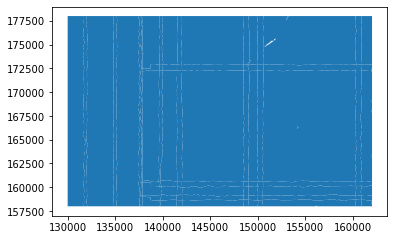

In [6]:
geo_dsm.plot()

In [7]:
geo_dsm.explore()

## Address to Find


In [20]:
# Requesting address info using API (geopunt)
address = "Maurice van meenen"

response = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&xy&c=1")
address_info = response.json() 

print(address_info)

{'LocationResult': [{'Municipality': 'Saint-Gilles', 'Zipcode': None, 'Thoroughfarename': 'Place Maurice Van Meenen', 'Housenumber': None, 'ID': 5070, 'FormattedAddress': 'Maurice Van Meenenplein, Sint-Gillis', 'Location': {'Lat_WGS84': 50.8247143208073, 'Lon_WGS84': 4.345810399998934, 'X_Lambert72': 148383.57, 'Y_Lambert72': 168254.1}, 'LocationType': 'urbis_straat', 'BoundingBox': {'LowerLeft': {'Lat_WGS84': 50.824054523484655, 'Lon_WGS84': 4.3446162714998255, 'X_Lambert72': 148299.41, 'Y_Lambert72': 168180.73}, 'UpperRight': {'Lat_WGS84': 50.82537410584774, 'Lon_WGS84': 4.347004562003352, 'X_Lambert72': 148467.73, 'Y_Lambert72': 168327.47}}}]}


### Address Coordinates (Lambert 72)

In [21]:
# Lambert coordinates for location
loc_x_lambert = x["LocationResult"][0]["Location"]["X_Lambert72"]
loc_y_lambert = x["LocationResult"][0]["Location"]["Y_Lambert72"]

print("Location: X_Lambert72 :",loc_x_lambert, "Y_Lambert72 :",loc_y_lambert)

Location: X_Lambert72 : 148383.57 Y_Lambert72 : 168254.1


In [22]:
# Lambert coordinates for BoundingBox(Lowerleft)

left_x_lambert = x["LocationResult"][0]["BoundingBox"]["LowerLeft"]["X_Lambert72"]
lower_y_lambert = x["LocationResult"][0]["BoundingBox"]["LowerLeft"]["Y_Lambert72"]
print("BoundingBox(Lowerleft): X_Lambert72 : ",left_x_lambert, "Y_Lambert72 : ",lower_y_lambert)

BoundingBox(Lowerleft): X_Lambert72 :  148299.41 Y_Lambert72 :  168180.73


In [23]:
# Lambert coordinates for BoundingBox(UpperRight)
right_x_lambert = x["LocationResult"][0]["BoundingBox"]["UpperRight"]["X_Lambert72"]
upper_y_lambert = x["LocationResult"][0]["BoundingBox"]["UpperRight"]["Y_Lambert72"]
print("BoundingBox(UpperRight): X_Lambert72 : ",right_x_lambert, "Y_Lambert72 : ",upper_y_lambert)

BoundingBox(UpperRight): X_Lambert72 :  148467.73 Y_Lambert72 :  168327.47


### Cropping Address from Tiff file

In [24]:
# Property coordinates
left = left_x_lambert 
lower = lower_y_lambert 
right = right_x_lambert 
upper = upper_y_lambert 

In [25]:
# Creating window using property coordinates to crop house
address_window = d_file.read(1,window=from_bounds(left,lower,right,upper,transform=d_file.transform ))

# cropped property from geotiff
address_window 

array([[93.99, 93.73, 93.53, ..., 87.48, 87.36, 87.35],
       [93.11, 92.86, 92.59, ..., 88.15, 87.92, 87.13],
       [92.14, 91.98, 91.66, ..., 88.81, 88.38, 87.82],
       ...,
       [92.82, 81.14, 75.91, ..., 76.98, 76.99, 77.03],
       [92.66, 76.03, 75.97, ..., 77.01, 77.03, 77.19],
       [92.  , 76.07, 76.01, ..., 77.01, 78.06, 79.2 ]], dtype=float32)

## Plotting 3D House

In [32]:
# plotting 3D cropped property using plotly
X = np.arange(0, address_window.shape[0]*1, 1)
Y = np.arange(0, address_window.shape[1]*-1, -1)
X, Y = np.meshgrid(X,Y)
fig = go.Figure(data=go.Surface(x=X, y=Y, z=address_window))
fig.show()